In [67]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

import scipy
from scipy import stats

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [68]:
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/nolabblistings.csv'
nola = pd.read_csv(address)

In [69]:
print(nola.head(10))
print(nola.describe())

    room_id   host_id        room_type  borough                neighborhood  \
0   2359037   1890423     Private room      NaN                    MID-CITY   
1   5046800   6489256  Entire home/apt      NaN   CENTRAL BUSINESS DISTRICT   
2   7176785   3946277     Private room      NaN               IRISH CHANNEL   
3   9899026  50277968  Entire home/apt      NaN                SEVENTH WARD   
4  11064920  15562279  Entire home/apt      NaN   CENTRAL BUSINESS DISTRICT   
5  10944415  37409832  Entire home/apt      NaN                    MID-CITY   
6   8196597    921339     Private room      NaN  LEONIDAS - WEST CARROLLTON   
7  11039704  17382242     Private room      NaN     CENTRAL CITY - MAGNOLIA   
8   4899348  25013366  Entire home/apt      NaN                 VIEUX CARRE   
9   5568527  28869577     Private room      NaN               ALGIERS POINT   

   reviews  overall_satisfaction  accommodates  bedrooms  price  minstay  \
0       61                   5.0             4       1

In [70]:
rcParams['figure.figsize'] = 5, 4 #this is the size of the plot
sb.set_style('whitegrid') #this is the style: white grid

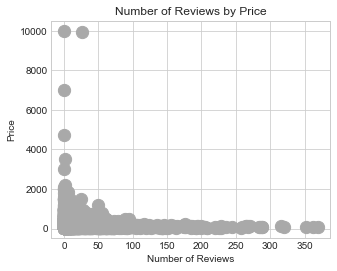

In [71]:
nola.plot(kind='scatter', x='reviews', y='price', c=['darkgray'], s=150)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Number of Reviews by Price')
plt.show()

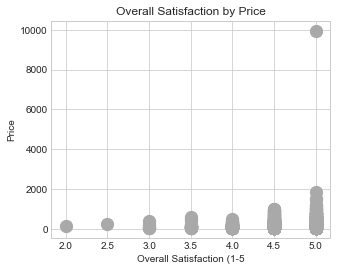

In [73]:
nola.plot(kind='scatter', x='overall_satisfaction', y='price', c=['darkgray'], s=150)
plt.xlabel('Overall Satisfaction (1-5')
plt.ylabel('Price')
plt.title('Overall Satisfaction by Price')
plt.show()

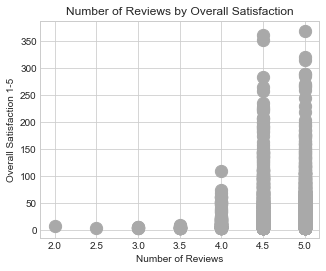

In [74]:
nola.plot(kind='scatter', x='overall_satisfaction', y='reviews', c=['darkgray'], s=150)
plt.xlabel('Number of Reviews')
plt.ylabel('Overall Satisfaction 1-5')
plt.title('Number of Reviews by Overall Satisfaction')
plt.show()

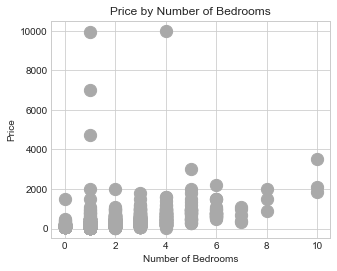

In [75]:
nola.plot(kind='scatter', x='bedrooms', y='price', c=['darkgray'], s=150)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price by Number of Bedrooms')
plt.show()

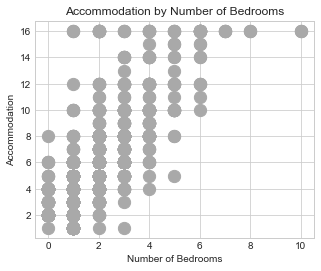

In [76]:
nola.plot(kind='scatter', x='bedrooms', y='accommodates', c=['darkgray'], s=150)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Accommodation')
plt.title('Accommodation by Number of Bedrooms')
plt.show()

In [77]:
nola_trim = nola[['reviews', 'price', 'overall_satisfaction', 'bedrooms', 'accommodates', 'minstay', 'room_type']]
#create dataframe for only focal vars

In [78]:
print(nola_trim.head(10))
print(nola_trim.describe())
#look at new dataset

   reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0       61     91                   5.0       1.0             4      1.0   
1        1    299                   NaN       1.0             4      3.0   
2        8     66                   5.0       1.0             2      1.0   
3        7    115                   4.5       1.0             4      2.0   
4        0   4750                   NaN       1.0             3      1.0   
5        6     99                   4.0       1.0             2      1.0   
6        6     49                   4.5       1.0             2      2.0   
7       17    110                   5.0       1.0             2      1.0   
8       40    225                   4.5       1.0             4      2.0   
9        0    150                   NaN       1.0             2      2.0   

         room_type  
0     Private room  
1  Entire home/apt  
2     Private room  
3  Entire home/apt  
4  Entire home/apt  
5  Entire home/apt  
6     Private ro

   reviews  price  overall_satisfaction  bedrooms  accommodates  minstay
0       61     91                   5.0       1.0             4      1.0
1        1    299                   NaN       1.0             4      3.0
2        8     66                   5.0       1.0             2      1.0
3        7    115                   4.5       1.0             4      2.0
4        0   4750                   NaN       1.0             3      1.0
5        6     99                   4.0       1.0             2      1.0
6        6     49                   4.5       1.0             2      2.0
7       17    110                   5.0       1.0             2      1.0
8       40    225                   4.5       1.0             4      2.0
9        0    150                   NaN       1.0             2      2.0
           reviews         price  overall_satisfaction     bedrooms  \
count  4177.000000   4177.000000           2724.000000  4174.000000   
mean     20.694278    206.365095              4.757526 

In [79]:
nola_trim.isnull().any()
#satisfaction, bedrooms, minstay have missing

reviews                 False
price                   False
overall_satisfaction     True
bedrooms                 True
accommodates            False
minstay                  True
room_type               False
dtype: bool

In [80]:
miss = nola_trim.isnull()
miss

,reviews,price,overall_satisfaction,bedrooms,accommodates,minstay,room_type
0,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False


In [81]:
def reject_outliers(nola_trim, m =2.):
    d = np.abs(nola_trim - np.median(nola_trim))
    mdev = np.median(d)
    s = d/mdev if mdev else 0
    return nola_trim[s>m]
nola_trim
#this doesn't work.

,reviews,price,overall_satisfaction,bedrooms,accommodates,minstay,room_type
0,61,91,5.0,1.0,4,1.0,Private room
1,1,299,NaN,1.0,4,3.0,Entire home/apt
2,8,66,5.0,1.0,2,1.0,Private room
3,7,115,4.5,1.0,4,2.0,Entire home/apt
4,0,4750,NaN,1.0,3,1.0,Entire home/apt
5,6,99,4.0,1.0,2,1.0,Entire home/apt
6,6,49,4.5,1.0,2,2.0,Private room
7,17,110,5.0,1.0,2,1.0,Private room
8,40,225,4.5,1.0,4,2.0,Entire home/apt
9,0,150,NaN,1.0,2,2.0,Private room


In [82]:
    nola_nomiss = nola_trim.dropna()
    print(nola_nomiss.head(10))
    #drop missing values
    nola_nomiss

    reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0        61     91                   5.0       1.0             4      1.0   
2         8     66                   5.0       1.0             2      1.0   
3         7    115                   4.5       1.0             4      2.0   
5         6     99                   4.0       1.0             2      1.0   
6         6     49                   4.5       1.0             2      2.0   
7        17    110                   5.0       1.0             2      1.0   
8        40    225                   4.5       1.0             4      2.0   
10       96     99                   4.5       1.0             4      3.0   
11       49   1200                   5.0       4.0            10      2.0   
13       95     60                   4.5       1.0             2      2.0   

          room_type  
0      Private room  
2      Private room  
3   Entire home/apt  
5   Entire home/apt  
6      Private room  
7      Private room 

,reviews,price,overall_satisfaction,bedrooms,accommodates,minstay,room_type
0,61,91,5.0,1.0,4,1.0,Private room
2,8,66,5.0,1.0,2,1.0,Private room
3,7,115,4.5,1.0,4,2.0,Entire home/apt
5,6,99,4.0,1.0,2,1.0,Entire home/apt
6,6,49,4.5,1.0,2,2.0,Private room
7,17,110,5.0,1.0,2,1.0,Private room
8,40,225,4.5,1.0,4,2.0,Entire home/apt
10,96,99,4.5,1.0,4,3.0,Entire home/apt
11,49,1200,5.0,4.0,10,2.0,Entire home/apt
13,95,60,4.5,1.0,2,2.0,Private room


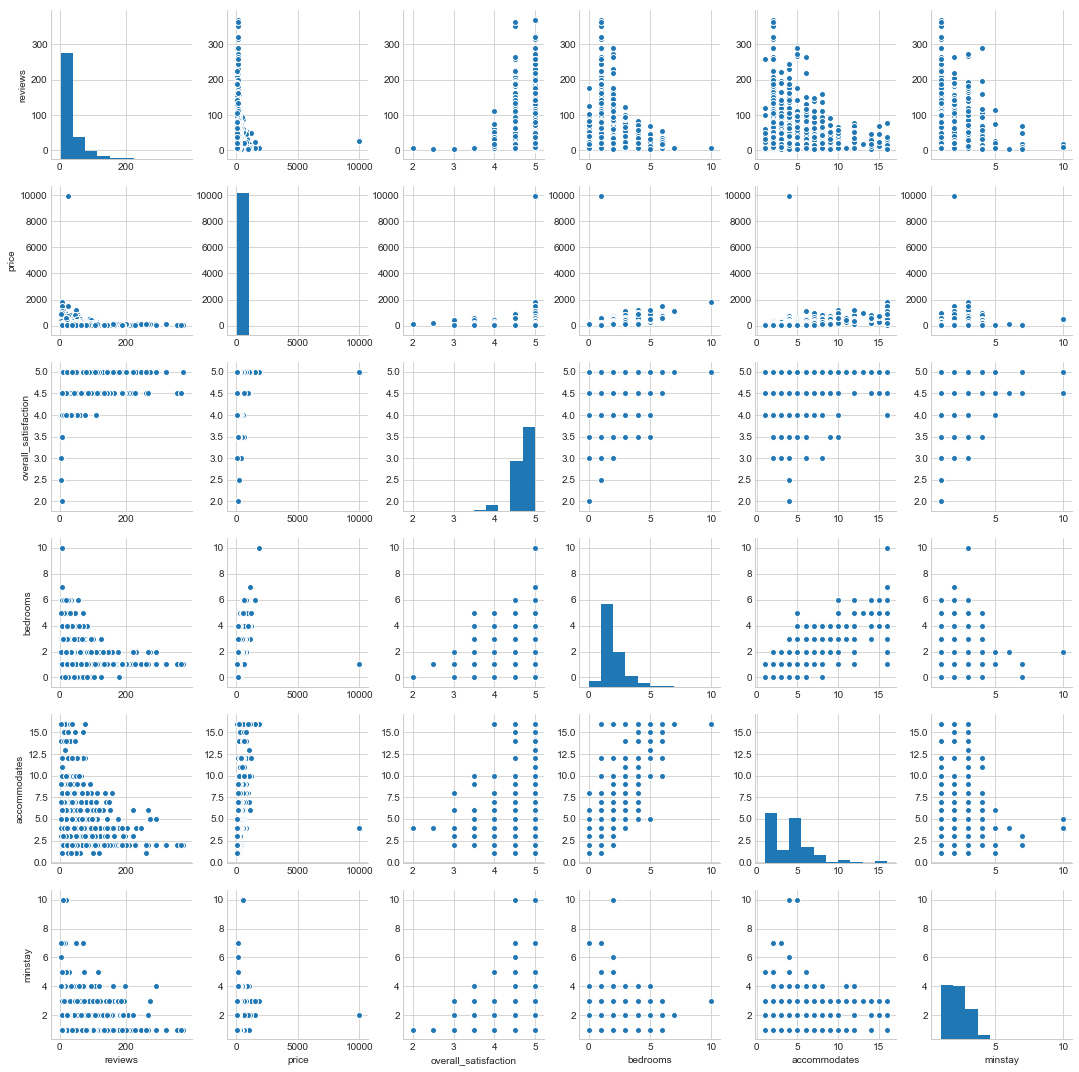

In [83]:
X = nola_nomiss[['reviews', 'price', 'overall_satisfaction', 'bedrooms', 'accommodates', 'minstay', 'room_type']]
sb.pairplot(X)
plt.show()

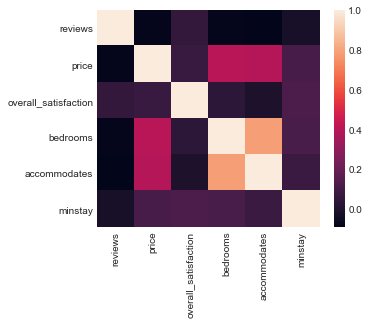

In [84]:
corr = X.corr()
corr
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [85]:
pearsonr_coefficient, p_value = pearsonr(nola_nomiss.reviews, nola_nomiss.price)
print('PearsonR Correlation Coefficient - Reviews, Price %0.3f' % (pearsonr_coefficient))

pearsonr_coefficient, p_value = pearsonr(nola_nomiss.accommodates, nola_nomiss.price)
print('PearsonR Correlation Coefficient - Accommodates, Price %0.3f' % (pearsonr_coefficient))

table = pd.crosstab(nola_nomiss.room_type, nola_nomiss.overall_satisfaction)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic - Room Type, Overall Satisfaction %0.3f p_value %0.3f' % (chi2, p))

table = pd.crosstab(nola_nomiss.room_type, nola_nomiss.price)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic - Room Type, Price %0.3f p_value %0.3f' % (chi2, p))

PearsonR Correlation Coefficient - Reviews, Price -0.082
PearsonR Correlation Coefficient - Accommodates, Price 0.395
Chi-square Statistic - Room Type, Overall Satisfaction 53.104 p_value 0.000
Chi-square Statistic - Room Type, Price 1842.816 p_value 0.000


In [86]:
y.groupby(X.room_type).mean()
#look at means by room type to see if there's natural order to them

room_type
Entire home/apt    206.874413
Private room        80.920420
Shared room         66.258065
Name: price, dtype: float64

In [88]:
#nola_nomiss['roomtypecat'] = pd.Categorical(nola_nomiss.room_type).labels
#this spits out a weird error - Entry point for launching an IPython kernal ?

nola_bin = pd.get_dummies(nola_nomiss['room_type'])
nolaBinNomiss = pd.concat([nola_nomiss, nola_bin], axis=1)
nolaBinNomiss

,reviews,price,overall_satisfaction,bedrooms,accommodates,minstay,room_type,Entire home/apt,Private room,Shared room
0,61,91,5.0,1.0,4,1.0,Private room,0,1,0
2,8,66,5.0,1.0,2,1.0,Private room,0,1,0
3,7,115,4.5,1.0,4,2.0,Entire home/apt,1,0,0
5,6,99,4.0,1.0,2,1.0,Entire home/apt,1,0,0
6,6,49,4.5,1.0,2,2.0,Private room,0,1,0
7,17,110,5.0,1.0,2,1.0,Private room,0,1,0
8,40,225,4.5,1.0,4,2.0,Entire home/apt,1,0,0
10,96,99,4.5,1.0,4,3.0,Entire home/apt,1,0,0
11,49,1200,5.0,4.0,10,2.0,Entire home/apt,1,0,0
13,95,60,4.5,1.0,2,2.0,Private room,0,1,0


In [94]:
y = nolaBinNomiss.price
#X = nola_nomiss.drop('price', axis=1)
X = nolaBinNomiss[['reviews', 'overall_satisfaction', 'bedrooms', 'accommodates', 'minstay', 'Private room', 'Shared room']]
#create DV and focal IV's for analysis

In [95]:
np.asarray(nolaBinNomiss)

array([[61, 91, 5.0, ..., 0, 1, 0],
       [8, 66, 5.0, ..., 0, 1, 0],
       [7, 115, 4.5, ..., 1, 0, 0],
       ..., 
       [21, 65, 5.0, ..., 0, 1, 0],
       [64, 75, 4.5, ..., 0, 1, 0],
       [37, 69, 5.0, ..., 0, 1, 0]], dtype=object)

In [99]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     278.3
Date:                Tue, 12 Dec 2017   Prob (F-statistic):          5.87e-304
Time:                        14:53:48   Log-Likelihood:                -16391.
No. Observations:                2401   AIC:                         3.280e+04
Df Residuals:                    2394   BIC:                         3.284e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
reviews                 -0.2811      0.112     -2.504      0.012      -0.501      -0.061
overall_satisfaction     1.8469      3.315      0.557      0.577      -4.653       8.347
bedrooms                59.2865      7.753      7.647      0.000      44.083      74.490
accommodates            16.5225      2.890      5.717      0.000      10.855      22.190
minstay                 12.2009      5.152      2.368      0.018       2.098      22.304
Private room           -36.8320     11.320     -3.254      0.001     -59.030     -14.634
Shared room            -50.0514     40.888     -1.224      0.221    -130.231      30.128
==============================================================================
Omnibus:                     6743.914   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        239769372.419
Skew:                          35.475   Prob(JB):                         0.00
Kurtosis:                    1549.500   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
X
y

0         91
2         66
3        115
5         99
6         49
7        110
8        225
10        99
11      1200
13        60
14       225
15        65
16       140
18       100
19       120
20        65
21       120
22        95
24       149
25        95
28       129
29        85
31        75
32        75
34       115
36       170
37       200
39        99
40       200
41       200
        ... 
4127      89
4128     110
4131      55
4133      60
4135      50
4137     150
4138      55
4141      34
4142      70
4143      98
4144      64
4145      65
4147      79
4148      90
4151      50
4152     120
4153      45
4154      50
4159      50
4163      40
4164      45
4166      89
4167      85
4168      99
4169      48
4170      54
4172      60
4173      65
4174      75
4176      69
Name: price, Length: 2401, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=1/3,
                                                        random_state=123)

In [103]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [104]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[  8.88178420e-18  -8.22675261e-16  -8.88178420e-18  -1.15463195e-16
  -5.44009282e-17  -6.21724894e-17   8.88178420e-18]
[ 1.  1.  1.  1.  1.  1.  1.]


In [106]:
pipeline=make_pipeline(preprocessing.StandardScaler(),
                                        RandomForestRegressor(n_estimators=100))
#print(pipeline.get_params())
#create pipeline for evaluating models

In [107]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                                    'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [108]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
print(clf.best_params_)
#discover which parameters are best for these data
print(clf.refit)
#refit on the training set

{'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'log2'}
True


In [110]:
y_pred = clf.predict(X_test)
#predict a new set of data
print(r2_score(y_test, y_pred))
# r2: 0.5676
#much better model once accounting for bedrooms, accommedations
print(mean_squared_error(y_test, y_pred))
# mse: 13730.57

0.572114893076
10999.3599713


In [111]:
#save the model for reuse later
joblib.dump(clf, 'rf_regressor.pkl')
clf2 =joblib.load('rf_regressor.pkl')
clf2.predict(X_test)

array([ 184.54326457,   75.08591161,   76.49457673,  293.24126019,
        214.57356094,  139.70617542,   97.46862027,  136.75752639,
         89.31646963,  186.53867589,  268.01215526,   84.71328743,
        180.36229836,  125.0164706 ,  138.21224758,   78.51449857,
        247.74155893,   73.57666567,   77.65479122,  290.7835671 ,
        150.7777191 ,   73.57666567,  149.24850442,   92.79647592,
        131.62199169,   94.58621897,  100.09668405,  144.03075154,
         84.07157741,  195.08555476,   83.7297975 ,  184.93129729,
        136.59533321,   85.87540812,   92.8912256 ,  292.36331088,
        138.21224758,   93.16612127,  213.89483733,  160.88339919,
        211.20774768,   96.53785282,  145.48403887,  192.62327613,
        215.99726634,  388.6432572 ,  338.679219  ,   87.62432127,
        192.52626943,  244.72998785,   82.93031288,  198.29020416,
        203.49135394,  145.7048181 ,   83.41283544,  134.3354495 ,
        265.24421789,  210.58279969,  200.17339761,  172.16626